In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [3]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
##EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [13]:
df.head(20)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998


In [6]:
df.shape


(18885, 12)

In [7]:
df.sample(7)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
5570,200906,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 1,B,67991
11727,201312,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Other,International,A,9498
16199,201612,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,359534
423,200510,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Other,International,A,11573
12798,201409,United Airlines,UA,United Airlines,UA,Domestic,US,Thru / Transit,Other,International,G,19
16178,201612,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Deplaned,Other,Terminal 3,F,6799
11911,201401,United Airlines,UA,United Airlines,UA,International,Europe,Enplaned,Other,International,G,18453


In [11]:
df.isna().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [14]:
df["Activity Period"]=pd.to_datetime(df["Activity Period"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              18885 non-null  datetime64[ns]
 1   Operating Airline            18885 non-null  object        
 2   Operating Airline IATA Code  18822 non-null  object        
 3   Published Airline            18885 non-null  object        
 4   Published Airline IATA Code  18822 non-null  object        
 5   GEO Summary                  18885 non-null  object        
 6   GEO Region                   18885 non-null  object        
 7   Activity Type Code           18885 non-null  object        
 8   Price Category Code          18885 non-null  object        
 9   Terminal                     18885 non-null  object        
 10  Boarding Area                18885 non-null  object        
 11  Passenger Count              18885 non-nu

In [20]:
df["month"]=df["Activity Period"].dt.month
df["day"]=df["Activity Period"].dt.day
df["year"]=df["Activity Period"].dt.year

In [23]:
df=df.drop(["Operating Airline IATA Code","Published Airline IATA Code","Published Airline","Activity Type Code"],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Activity Period      18885 non-null  datetime64[ns]
 1   Operating Airline    18885 non-null  object        
 2   GEO Summary          18885 non-null  object        
 3   GEO Region           18885 non-null  object        
 4   Price Category Code  18885 non-null  object        
 5   Terminal             18885 non-null  object        
 6   Boarding Area        18885 non-null  object        
 7   Passenger Count      18885 non-null  int64         
 8   month                18885 non-null  int64         
 9   day                  18885 non-null  int64         
 10  year                 18885 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 1.6+ MB


In [27]:
df=pd.get_dummies(df,drop_first=True)

In [32]:
df=df.drop(["Activity Period"],axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Columns: 113 entries, Passenger Count to Boarding Area_Other
dtypes: int64(4), uint8(109)
memory usage: 2.5 MB


In [45]:
model=KMeans(n_clusters=5)

In [46]:
model=model.fit(df)

In [47]:
pred=model.predict(df)

In [48]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
silhouette_score(df,pred)

0.7844924637060949

In [50]:
clust=df.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
allscore=[]
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(df)
        score=silhouette_score(df,pred)
        print(f"Number of cluster{no_of_cluster},silhouette{score}")
        allscore.append(score)
        allclusters.append(no_of_cluster)

clust(10)

Number of cluster2,silhouette0.8596461938912563
Number of cluster3,silhouette0.8285981312163069
Number of cluster4,silhouette0.7861526380487875
Number of cluster5,silhouette0.7844924637060949
Number of cluster6,silhouette0.6614226365870746
Number of cluster7,silhouette0.66138817525019
Number of cluster8,silhouette0.6463647516322791
Number of cluster9,silhouette0.6405839557287151
Number of cluster10,silhouette0.6142216696416999


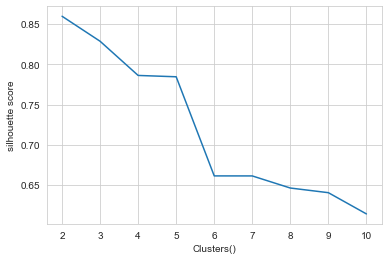

In [52]:
plt.plot(allclusters,allscore)
plt.xlabel("Clusters()")
plt.ylabel("silhouette score");

In [53]:
allscore= []
allclusters= []
sum_of_squared_distances= []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(df)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(df,pred)
        print("Number of cluster {},silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)

clust(9)

Number of cluster 2,silhouette 0.8596461938912563
Number of cluster 3,silhouette 0.8285981312163069
Number of cluster 4,silhouette 0.7861526380487875
Number of cluster 5,silhouette 0.7845446632145425
Number of cluster 6,silhouette 0.6606359366933688
Number of cluster 7,silhouette 0.6620848419627127
Number of cluster 8,silhouette 0.6459047726245569
Number of cluster 9,silhouette 0.6399459571946492


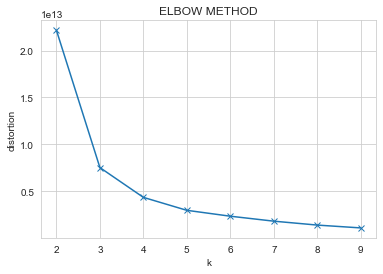

In [54]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("distortion")
plt.title("ELBOW METHOD")
plt.show();